In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from mp1 import *

Using TensorFlow backend.


In [3]:
[X_train, Y_train] = generate_dataset_classification(300, 20)
[X_val, Y_val] = generate_dataset_classification(100, 20)

Creating data:
0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 Creating data:
0 10 20 30 40 50 60 70 80 90 

In [4]:
X_train.shape # 300 pts of dimension 5184

(300, 5184)

## 2. Simple Classification
### 2.1 Simple model using stochastic gradient descent (sgd)

To build a linear classifier in Keras we only need to add a Dense layer with a softmax activation function as the output is a probability distribution vector. Here, as we want to classify 3 classes, we set the ouput of the Dense layer to 3. Moreover, we use a categorical crossentropy loss function as we are dealing with a classification problem.

Tuning the learning rate, I choose it to be $10^{-4}$. I also set the momentum to 0.9 in the stochastic gradient descent, to account for the "acceleration" we already acquired in a certain direction in the previous iteration. This leads to the following model:

In [5]:
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils.np_utils import to_categorical

# Build model
model = Sequential()
model.add(Dense(3, input_dim=X_train.shape[1], activation="softmax"))

sgd = optimizers.SGD(lr=1e-4, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 15555     
Total params: 15,555
Trainable params: 15,555
Non-trainable params: 0
_________________________________________________________________


__Note__: here I choose to plot the training phase using TQDMNotebookCallback as there is still some bug using the inner Keras function. So you need to install the package. If you don't want to install the package, you can replace the last line by:

```python 
    model.fit(X_train, Y_train_bin, 
              validation_data=(X_val, Y_val_bin),
              epochs=epochs, batch_size=32, callbacks=[checkpointer], verbose=2)
```

If __verbose=2__ leads to a bug, use __verbose=1__.

As you can see I've also generate a validation set that I use to save the best weights of the model (which might not be the weights of the last epoch) using ModelCheckpoint

In [6]:
from keras.callbacks import ModelCheckpoint
from keras_tqdm import TQDMNotebookCallback

epochs = 100

Y_train_bin = to_categorical(Y_train)
Y_val_bin = to_categorical(Y_val)

checkpointer = ModelCheckpoint(filepath='saved_models/part2/weights.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)

# train the model
model.fit(X_train, Y_train_bin, 
          validation_data=(X_val, Y_val_bin),
          epochs=epochs, batch_size=32, callbacks=[checkpointer, TQDMNotebookCallback(leave_inner=True, leave_outer=True)], verbose=0)

Epoch 00000: val_loss improved from inf to 1.25792, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00001: val_loss improved from 1.25792 to 1.11736, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00002: val_loss improved from 1.11736 to 1.01751, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00003: val_loss improved from 1.01751 to 0.95314, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00004: val_loss improved from 0.95314 to 0.89880, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00005: val_loss improved from 0.89880 to 0.85324, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00006: val_loss improved from 0.85324 to 0.82009, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00007: val_loss improved from 0.82009 to 0.78792, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00008: val_loss improved from 0.78792 to 0.75970, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00009: val_loss improved from 0.75970 to 0.73296, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00010: val_loss improved from 0.73296 to 0.71178, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00011: val_loss improved from 0.71178 to 0.68832, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00012: val_loss improved from 0.68832 to 0.66222, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00013: val_loss improved from 0.66222 to 0.65091, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00014: val_loss improved from 0.65091 to 0.62710, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00015: val_loss improved from 0.62710 to 0.61820, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00016: val_loss improved from 0.61820 to 0.59569, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00017: val_loss improved from 0.59569 to 0.58208, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00018: val_loss improved from 0.58208 to 0.57351, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00019: val_loss improved from 0.57351 to 0.55964, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00020: val_loss improved from 0.55964 to 0.54442, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00021: val_loss improved from 0.54442 to 0.53648, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00022: val_loss improved from 0.53648 to 0.52284, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00023: val_loss improved from 0.52284 to 0.52024, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00024: val_loss improved from 0.52024 to 0.50498, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00025: val_loss improved from 0.50498 to 0.49694, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00026: val_loss improved from 0.49694 to 0.48660, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00027: val_loss improved from 0.48660 to 0.48656, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00028: val_loss improved from 0.48656 to 0.47551, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00029: val_loss improved from 0.47551 to 0.46212, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00030: val_loss improved from 0.46212 to 0.45708, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00031: val_loss improved from 0.45708 to 0.44884, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00032: val_loss did not improve


Epoch 00033: val_loss improved from 0.44884 to 0.43789, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00034: val_loss improved from 0.43789 to 0.43036, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00035: val_loss improved from 0.43036 to 0.42163, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00036: val_loss improved from 0.42163 to 0.42059, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00037: val_loss improved from 0.42059 to 0.41099, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00038: val_loss improved from 0.41099 to 0.40524, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00039: val_loss did not improve


Epoch 00040: val_loss improved from 0.40524 to 0.39770, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00041: val_loss improved from 0.39770 to 0.39325, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00042: val_loss improved from 0.39325 to 0.38413, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00043: val_loss improved from 0.38413 to 0.38405, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00044: val_loss improved from 0.38405 to 0.38003, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00045: val_loss improved from 0.38003 to 0.37162, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00046: val_loss did not improve


Epoch 00047: val_loss improved from 0.37162 to 0.36251, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00048: val_loss improved from 0.36251 to 0.35966, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00049: val_loss did not improve


Epoch 00050: val_loss improved from 0.35966 to 0.35601, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00051: val_loss improved from 0.35601 to 0.35405, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00052: val_loss did not improve


Epoch 00053: val_loss improved from 0.35405 to 0.34600, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00054: val_loss improved from 0.34600 to 0.34026, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00055: val_loss did not improve


Epoch 00056: val_loss improved from 0.34026 to 0.33215, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00057: val_loss improved from 0.33215 to 0.32845, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00058: val_loss did not improve


Epoch 00059: val_loss improved from 0.32845 to 0.32394, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00060: val_loss improved from 0.32394 to 0.32070, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00061: val_loss improved from 0.32070 to 0.31929, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00062: val_loss did not improve


Epoch 00063: val_loss improved from 0.31929 to 0.31253, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00064: val_loss improved from 0.31253 to 0.30974, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00065: val_loss improved from 0.30974 to 0.30924, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00066: val_loss improved from 0.30924 to 0.30220, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00067: val_loss did not improve


Epoch 00068: val_loss did not improve


Epoch 00069: val_loss improved from 0.30220 to 0.29929, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00070: val_loss improved from 0.29929 to 0.29532, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00071: val_loss did not improve


Epoch 00072: val_loss improved from 0.29532 to 0.28833, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00073: val_loss did not improve


Epoch 00074: val_loss improved from 0.28833 to 0.28449, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00075: val_loss did not improve


Epoch 00076: val_loss improved from 0.28449 to 0.28416, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00077: val_loss improved from 0.28416 to 0.27514, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00078: val_loss did not improve


Epoch 00079: val_loss improved from 0.27514 to 0.27136, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00080: val_loss did not improve


Epoch 00081: val_loss did not improve


Epoch 00082: val_loss improved from 0.27136 to 0.26655, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00083: val_loss did not improve


Epoch 00084: val_loss did not improve


Epoch 00085: val_loss did not improve


Epoch 00086: val_loss did not improve


Epoch 00087: val_loss improved from 0.26655 to 0.25945, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00088: val_loss did not improve


Epoch 00089: val_loss did not improve


Epoch 00090: val_loss improved from 0.25945 to 0.25673, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00091: val_loss did not improve


Epoch 00092: val_loss improved from 0.25673 to 0.25338, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00093: val_loss improved from 0.25338 to 0.24974, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00094: val_loss did not improve


Epoch 00095: val_loss did not improve


Epoch 00096: val_loss improved from 0.24974 to 0.24499, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00097: val_loss improved from 0.24499 to 0.24498, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00098: val_loss improved from 0.24498 to 0.24448, saving model to saved_models/part2/weights.best.from_scratch.hdf5


Epoch 00099: val_loss improved from 0.24448 to 0.24269, saving model to saved_models/part2/weights.best.from_scratch.hdf5



In [7]:
## load best weights
model.load_weights('saved_models/part2/weights.best.from_scratch.hdf5')

### Test the model

In [8]:
## generate a testing dataset
[X_test, Y_test] = generate_dataset_classification(100, 20)
Y_test = to_categorical(Y_test)

Creating data:
0 10 20 30 40 50 60 70 80 90 

In [9]:
score = model.evaluate(X_test, Y_test, batch_size=32)

 32/100 [========>.....................] - ETA: 0s

In [10]:
print('loss: %.02f, accuracy: %.02f %%' % (score[0], score[1]*100))

loss: 0.21, accuracy: 100.00 %


So, at the end, generating a testing set and evaluating the model, I obtained an accuracy of 100.00% (well sometimes less as I didn't set a random seed). Yet, we can note that this accuracy might differ at each execution of the cell as the weights of the model are initialized randomly. To avoid this we can set a random seed and specifiy the weights initialization in Keras. Moreover, this high accuracy is obtained due to the fact that I've setted the __momentum__ parameter.

### 2.2 Simple model using Adam optimizer

In [11]:
# Build model
model = Sequential()
model.add(Dense(3, input_dim=X_train.shape[1], activation="softmax"))

adam = optimizers.Adam(lr=1e-4, beta_1=0.8, beta_2=0.999, epsilon=1e-08, decay=0)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 3)                 15555     
Total params: 15,555
Trainable params: 15,555
Non-trainable params: 0
_________________________________________________________________


In [12]:
from keras.callbacks import ModelCheckpoint
from keras_tqdm import TQDMNotebookCallback

epochs = 100

Y_train_bin = to_categorical(Y_train)
Y_val_bin = to_categorical(Y_val)

checkpointer = ModelCheckpoint(filepath='saved_models/part2_adam/weights.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)

# train the model
model.fit(X_train, Y_train_bin, 
          validation_data=(X_val, Y_val_bin),
          epochs=epochs, batch_size=32, callbacks=[checkpointer, TQDMNotebookCallback(leave_inner=True, leave_outer=True)], verbose=0)

Epoch 00000: val_loss improved from inf to 1.00531, saving model to saved_models/part2_adam/weights.best.from_scratch.hdf5


Epoch 00001: val_loss improved from 1.00531 to 0.95063, saving model to saved_models/part2_adam/weights.best.from_scratch.hdf5


Epoch 00002: val_loss improved from 0.95063 to 0.88239, saving model to saved_models/part2_adam/weights.best.from_scratch.hdf5


Epoch 00003: val_loss improved from 0.88239 to 0.82761, saving model to saved_models/part2_adam/weights.best.from_scratch.hdf5


Epoch 00004: val_loss improved from 0.82761 to 0.78569, saving model to saved_models/part2_adam/weights.best.from_scratch.hdf5


Epoch 00005: val_loss improved from 0.78569 to 0.75247, saving model to saved_models/part2_adam/weights.best.from_scratch.hdf5


Epoch 00006: val_loss improved from 0.75247 to 0.71608, saving model to saved_models/part2_adam/weights.best.from_scratch.hdf5


Epoch 00007: val_loss improved from 0.71608 to 0.67975, saving model to saved_models/part2_adam/weights.best.from_scratch.hdf5


Epoch 00008: val_loss improved from 0.67975 to 0.66243, saving model to saved_models/part2_adam/weights.best.from_scratch.hdf5


Epoch 00009: val_loss improved from 0.66243 to 0.63440, saving model to saved_models/part2_adam/weights.best.from_scratch.hdf5


Epoch 00010: val_loss improved from 0.63440 to 0.60743, saving model to saved_models/part2_adam/weights.best.from_scratch.hdf5


Epoch 00011: val_loss improved from 0.60743 to 0.58345, saving model to saved_models/part2_adam/weights.best.from_scratch.hdf5


Epoch 00012: val_loss improved from 0.58345 to 0.55280, saving model to saved_models/part2_adam/weights.best.from_scratch.hdf5


Epoch 00013: val_loss improved from 0.55280 to 0.54667, saving model to saved_models/part2_adam/weights.best.from_scratch.hdf5


Epoch 00014: val_loss improved from 0.54667 to 0.51381, saving model to saved_models/part2_adam/weights.best.from_scratch.hdf5


Epoch 00015: val_loss improved from 0.51381 to 0.50964, saving model to saved_models/part2_adam/weights.best.from_scratch.hdf5


Epoch 00016: val_loss improved from 0.50964 to 0.48430, saving model to saved_models/part2_adam/weights.best.from_scratch.hdf5


Epoch 00017: val_loss improved from 0.48430 to 0.46086, saving model to saved_models/part2_adam/weights.best.from_scratch.hdf5


Epoch 00018: val_loss improved from 0.46086 to 0.44975, saving model to saved_models/part2_adam/weights.best.from_scratch.hdf5


Epoch 00019: val_loss did not improve


Epoch 00020: val_loss improved from 0.44975 to 0.42498, saving model to saved_models/part2_adam/weights.best.from_scratch.hdf5


Epoch 00021: val_loss improved from 0.42498 to 0.40719, saving model to saved_models/part2_adam/weights.best.from_scratch.hdf5


Epoch 00022: val_loss improved from 0.40719 to 0.39577, saving model to saved_models/part2_adam/weights.best.from_scratch.hdf5


Epoch 00023: val_loss did not improve


Epoch 00024: val_loss improved from 0.39577 to 0.37495, saving model to saved_models/part2_adam/weights.best.from_scratch.hdf5


Epoch 00025: val_loss improved from 0.37495 to 0.37264, saving model to saved_models/part2_adam/weights.best.from_scratch.hdf5


Epoch 00026: val_loss improved from 0.37264 to 0.35512, saving model to saved_models/part2_adam/weights.best.from_scratch.hdf5


Epoch 00027: val_loss did not improve


Epoch 00028: val_loss improved from 0.35512 to 0.34357, saving model to saved_models/part2_adam/weights.best.from_scratch.hdf5


Epoch 00029: val_loss improved from 0.34357 to 0.33792, saving model to saved_models/part2_adam/weights.best.from_scratch.hdf5


Epoch 00030: val_loss improved from 0.33792 to 0.32301, saving model to saved_models/part2_adam/weights.best.from_scratch.hdf5


Epoch 00031: val_loss improved from 0.32301 to 0.31206, saving model to saved_models/part2_adam/weights.best.from_scratch.hdf5


Epoch 00032: val_loss improved from 0.31206 to 0.30468, saving model to saved_models/part2_adam/weights.best.from_scratch.hdf5


Epoch 00033: val_loss improved from 0.30468 to 0.30092, saving model to saved_models/part2_adam/weights.best.from_scratch.hdf5


Epoch 00034: val_loss did not improve


Epoch 00035: val_loss improved from 0.30092 to 0.28778, saving model to saved_models/part2_adam/weights.best.from_scratch.hdf5


Epoch 00036: val_loss improved from 0.28778 to 0.28153, saving model to saved_models/part2_adam/weights.best.from_scratch.hdf5


Epoch 00037: val_loss did not improve


Epoch 00038: val_loss improved from 0.28153 to 0.27186, saving model to saved_models/part2_adam/weights.best.from_scratch.hdf5


Epoch 00039: val_loss did not improve


Epoch 00040: val_loss improved from 0.27186 to 0.25692, saving model to saved_models/part2_adam/weights.best.from_scratch.hdf5


Epoch 00041: val_loss improved from 0.25692 to 0.25579, saving model to saved_models/part2_adam/weights.best.from_scratch.hdf5


Epoch 00042: val_loss improved from 0.25579 to 0.25266, saving model to saved_models/part2_adam/weights.best.from_scratch.hdf5


Epoch 00043: val_loss did not improve


Epoch 00044: val_loss improved from 0.25266 to 0.24461, saving model to saved_models/part2_adam/weights.best.from_scratch.hdf5


Epoch 00045: val_loss improved from 0.24461 to 0.23996, saving model to saved_models/part2_adam/weights.best.from_scratch.hdf5


Epoch 00046: val_loss did not improve


Epoch 00047: val_loss improved from 0.23996 to 0.23188, saving model to saved_models/part2_adam/weights.best.from_scratch.hdf5


Epoch 00048: val_loss improved from 0.23188 to 0.23110, saving model to saved_models/part2_adam/weights.best.from_scratch.hdf5


Epoch 00049: val_loss did not improve


Epoch 00050: val_loss did not improve


Epoch 00051: val_loss improved from 0.23110 to 0.21553, saving model to saved_models/part2_adam/weights.best.from_scratch.hdf5


Epoch 00052: val_loss did not improve


Epoch 00053: val_loss improved from 0.21553 to 0.20756, saving model to saved_models/part2_adam/weights.best.from_scratch.hdf5


Epoch 00054: val_loss improved from 0.20756 to 0.20580, saving model to saved_models/part2_adam/weights.best.from_scratch.hdf5


Epoch 00055: val_loss improved from 0.20580 to 0.20205, saving model to saved_models/part2_adam/weights.best.from_scratch.hdf5


Epoch 00056: val_loss improved from 0.20205 to 0.19860, saving model to saved_models/part2_adam/weights.best.from_scratch.hdf5


Epoch 00057: val_loss improved from 0.19860 to 0.19610, saving model to saved_models/part2_adam/weights.best.from_scratch.hdf5


Epoch 00058: val_loss improved from 0.19610 to 0.19285, saving model to saved_models/part2_adam/weights.best.from_scratch.hdf5


Epoch 00059: val_loss did not improve


Epoch 00060: val_loss improved from 0.19285 to 0.18877, saving model to saved_models/part2_adam/weights.best.from_scratch.hdf5


Epoch 00061: val_loss improved from 0.18877 to 0.18451, saving model to saved_models/part2_adam/weights.best.from_scratch.hdf5


Epoch 00062: val_loss improved from 0.18451 to 0.18264, saving model to saved_models/part2_adam/weights.best.from_scratch.hdf5


Epoch 00063: val_loss improved from 0.18264 to 0.17888, saving model to saved_models/part2_adam/weights.best.from_scratch.hdf5


Epoch 00064: val_loss improved from 0.17888 to 0.17677, saving model to saved_models/part2_adam/weights.best.from_scratch.hdf5


Epoch 00065: val_loss did not improve


Epoch 00066: val_loss did not improve


Epoch 00067: val_loss improved from 0.17677 to 0.16782, saving model to saved_models/part2_adam/weights.best.from_scratch.hdf5


Epoch 00068: val_loss improved from 0.16782 to 0.16759, saving model to saved_models/part2_adam/weights.best.from_scratch.hdf5


Epoch 00069: val_loss did not improve


Epoch 00070: val_loss improved from 0.16759 to 0.16156, saving model to saved_models/part2_adam/weights.best.from_scratch.hdf5


Epoch 00071: val_loss did not improve


Epoch 00072: val_loss did not improve


Epoch 00073: val_loss improved from 0.16156 to 0.15547, saving model to saved_models/part2_adam/weights.best.from_scratch.hdf5


Epoch 00074: val_loss did not improve


Epoch 00075: val_loss improved from 0.15547 to 0.15021, saving model to saved_models/part2_adam/weights.best.from_scratch.hdf5


Epoch 00076: val_loss did not improve


Epoch 00077: val_loss improved from 0.15021 to 0.14677, saving model to saved_models/part2_adam/weights.best.from_scratch.hdf5


Epoch 00078: val_loss did not improve


Epoch 00079: val_loss did not improve


Epoch 00080: val_loss did not improve


Epoch 00081: val_loss improved from 0.14677 to 0.14593, saving model to saved_models/part2_adam/weights.best.from_scratch.hdf5


Epoch 00082: val_loss improved from 0.14593 to 0.13935, saving model to saved_models/part2_adam/weights.best.from_scratch.hdf5


Epoch 00083: val_loss improved from 0.13935 to 0.13623, saving model to saved_models/part2_adam/weights.best.from_scratch.hdf5


Epoch 00084: val_loss did not improve


Epoch 00085: val_loss improved from 0.13623 to 0.13311, saving model to saved_models/part2_adam/weights.best.from_scratch.hdf5


Epoch 00086: val_loss did not improve


Epoch 00087: val_loss improved from 0.13311 to 0.13240, saving model to saved_models/part2_adam/weights.best.from_scratch.hdf5


Epoch 00088: val_loss improved from 0.13240 to 0.13197, saving model to saved_models/part2_adam/weights.best.from_scratch.hdf5


Epoch 00089: val_loss did not improve


Epoch 00090: val_loss improved from 0.13197 to 0.12541, saving model to saved_models/part2_adam/weights.best.from_scratch.hdf5


Epoch 00091: val_loss did not improve


Epoch 00092: val_loss improved from 0.12541 to 0.12273, saving model to saved_models/part2_adam/weights.best.from_scratch.hdf5


Epoch 00093: val_loss did not improve


Epoch 00094: val_loss improved from 0.12273 to 0.12018, saving model to saved_models/part2_adam/weights.best.from_scratch.hdf5


Epoch 00095: val_loss did not improve


Epoch 00096: val_loss did not improve


Epoch 00097: val_loss improved from 0.12018 to 0.11653, saving model to saved_models/part2_adam/weights.best.from_scratch.hdf5


Epoch 00098: val_loss did not improve


Epoch 00099: val_loss did not improve



In [13]:
# load the best weights
model.load_weights('saved_models/part2_adam/weights.best.from_scratch.hdf5')

In [14]:
## Test the model
score = model.evaluate(X_test, Y_test, batch_size=32)

 32/100 [========>.....................] - ETA: 0s

In [15]:
print('loss: %.02f, accuracy: %.02f %%' % (score[0], score[1]*100))

loss: 0.11, accuracy: 100.00 %


Using the same model but with the adam optimizer leads to a even higher accuracy on the test set (Usually). Actually, Adam and Rmsprop appears to be the best standard optimizers use in deep learning currently as they leads to a faster convergence. Here, again, we can notice that the accuracy might differ at each execution of the cell. To be consistent and analysis the effect of using adam optimizer, one might use the same random seed for both models.

## 3. Visualization of the solution

In [16]:
#  get_weights()[0] as shape (5184, 3) i.e (72,72,3) three channels of size 72 x 72
#  get_weights()[1] as shape (3, 1)
model.get_weights()

[array([[-0.00190692, -0.02236115,  0.02234912],
        [-0.02783319,  0.03090113,  0.01080253],
        [ 0.02080733, -0.03398569, -0.02030509],
        ..., 
        [ 0.00512588, -0.03331573,  0.00431588],
        [ 0.02435428, -0.01387035,  0.0228279 ],
        [ 0.0120769 ,  0.00199893, -0.02852268]], dtype=float32),
 array([ 0.00136225, -0.00052218, -0.00122738], dtype=float32)]

In [17]:
weights = model.get_weights()[0]

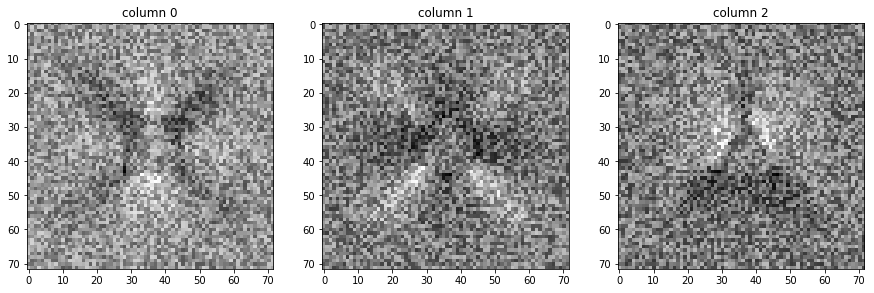

In [18]:
f, ax = plt.subplots(1, 3, figsize=(15,10))
for i in range(weights.shape[1]):
    ax[i].set_title('column %d' % i)
    ax[i].imshow(weights[:, i].reshape(72, -1), cmap='gray')

Here are the 3 weights of the model. I forced them to be displayed in grayscale. It actually displays which neurons of the linear classifier are activated (white) and which are deactivate (black). We can recognize a certain pattern.

## 4. A More difficult Classification Problem

In [19]:
[X_train, Y_train] = generate_dataset_classification(300, 20, True)
[X_val, Y_val] = generate_dataset_classification(100, 20, True)

Creating data:
0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 Creating data:
0 10 20 30 40 50 60 70 80 90 

### 4.1 Using previous linear classifier

In [22]:
model = Sequential()
model.add(Dense(3, input_dim=X_train.shape[1], activation="softmax"))

adam = optimizers.Adam(lr=1e-5, beta_1=0.8, beta_2=0.999, epsilon=1e-08)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 3)                 15555     
Total params: 15,555
Trainable params: 15,555
Non-trainable params: 0
_________________________________________________________________


In [23]:
epochs = 100

Y_train_bin = to_categorical(Y_train)
Y_val_bin = to_categorical(Y_val)

checkpointer = ModelCheckpoint(filepath='saved_models/part4/weights.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)

# train the model
model.fit(X_train, Y_train_bin, 
          validation_data=(X_val, Y_val_bin),
          epochs=epochs, batch_size=32, callbacks=[checkpointer, TQDMNotebookCallback(leave_inner=True, leave_outer=True)], verbose=0)

Epoch 00000: val_loss improved from inf to 1.57166, saving model to saved_models/part4/weights.best.from_scratch.hdf5


Epoch 00001: val_loss improved from 1.57166 to 1.35277, saving model to saved_models/part4/weights.best.from_scratch.hdf5


Epoch 00002: val_loss improved from 1.35277 to 1.21050, saving model to saved_models/part4/weights.best.from_scratch.hdf5


Epoch 00003: val_loss improved from 1.21050 to 1.13940, saving model to saved_models/part4/weights.best.from_scratch.hdf5


Epoch 00004: val_loss improved from 1.13940 to 1.11699, saving model to saved_models/part4/weights.best.from_scratch.hdf5


Epoch 00005: val_loss improved from 1.11699 to 1.11149, saving model to saved_models/part4/weights.best.from_scratch.hdf5


Epoch 00006: val_loss improved from 1.11149 to 1.10788, saving model to saved_models/part4/weights.best.from_scratch.hdf5


Epoch 00007: val_loss improved from 1.10788 to 1.10558, saving model to saved_models/part4/weights.best.from_scratch.hdf5


Epoch 00008: val_loss improved from 1.10558 to 1.10503, saving model to saved_models/part4/weights.best.from_scratch.hdf5


Epoch 00009: val_loss improved from 1.10503 to 1.10278, saving model to saved_models/part4/weights.best.from_scratch.hdf5


Epoch 00010: val_loss improved from 1.10278 to 1.09781, saving model to saved_models/part4/weights.best.from_scratch.hdf5


Epoch 00011: val_loss improved from 1.09781 to 1.09704, saving model to saved_models/part4/weights.best.from_scratch.hdf5


Epoch 00012: val_loss improved from 1.09704 to 1.09506, saving model to saved_models/part4/weights.best.from_scratch.hdf5


Epoch 00013: val_loss improved from 1.09506 to 1.09407, saving model to saved_models/part4/weights.best.from_scratch.hdf5


Epoch 00014: val_loss did not improve


Epoch 00015: val_loss improved from 1.09407 to 1.09105, saving model to saved_models/part4/weights.best.from_scratch.hdf5


Epoch 00016: val_loss improved from 1.09105 to 1.08814, saving model to saved_models/part4/weights.best.from_scratch.hdf5


Epoch 00017: val_loss improved from 1.08814 to 1.08581, saving model to saved_models/part4/weights.best.from_scratch.hdf5


Epoch 00018: val_loss did not improve


Epoch 00019: val_loss improved from 1.08581 to 1.08404, saving model to saved_models/part4/weights.best.from_scratch.hdf5


Epoch 00020: val_loss did not improve


Epoch 00021: val_loss improved from 1.08404 to 1.08311, saving model to saved_models/part4/weights.best.from_scratch.hdf5


Epoch 00022: val_loss improved from 1.08311 to 1.07537, saving model to saved_models/part4/weights.best.from_scratch.hdf5


Epoch 00023: val_loss improved from 1.07537 to 1.07445, saving model to saved_models/part4/weights.best.from_scratch.hdf5


Epoch 00024: val_loss improved from 1.07445 to 1.07412, saving model to saved_models/part4/weights.best.from_scratch.hdf5


Epoch 00025: val_loss improved from 1.07412 to 1.07238, saving model to saved_models/part4/weights.best.from_scratch.hdf5


Epoch 00026: val_loss improved from 1.07238 to 1.06898, saving model to saved_models/part4/weights.best.from_scratch.hdf5


Epoch 00027: val_loss improved from 1.06898 to 1.06623, saving model to saved_models/part4/weights.best.from_scratch.hdf5


Epoch 00028: val_loss improved from 1.06623 to 1.06392, saving model to saved_models/part4/weights.best.from_scratch.hdf5


Epoch 00029: val_loss did not improve


Epoch 00030: val_loss improved from 1.06392 to 1.06135, saving model to saved_models/part4/weights.best.from_scratch.hdf5


Epoch 00031: val_loss did not improve


Epoch 00032: val_loss improved from 1.06135 to 1.05909, saving model to saved_models/part4/weights.best.from_scratch.hdf5


Epoch 00033: val_loss did not improve


Epoch 00034: val_loss improved from 1.05909 to 1.05872, saving model to saved_models/part4/weights.best.from_scratch.hdf5


Epoch 00035: val_loss improved from 1.05872 to 1.05558, saving model to saved_models/part4/weights.best.from_scratch.hdf5


Epoch 00036: val_loss improved from 1.05558 to 1.05303, saving model to saved_models/part4/weights.best.from_scratch.hdf5


Epoch 00037: val_loss did not improve


Epoch 00038: val_loss improved from 1.05303 to 1.05263, saving model to saved_models/part4/weights.best.from_scratch.hdf5


Epoch 00039: val_loss improved from 1.05263 to 1.04641, saving model to saved_models/part4/weights.best.from_scratch.hdf5


Epoch 00040: val_loss improved from 1.04641 to 1.04378, saving model to saved_models/part4/weights.best.from_scratch.hdf5


Epoch 00041: val_loss did not improve


Epoch 00042: val_loss did not improve


Epoch 00043: val_loss improved from 1.04378 to 1.04194, saving model to saved_models/part4/weights.best.from_scratch.hdf5


Epoch 00044: val_loss improved from 1.04194 to 1.03887, saving model to saved_models/part4/weights.best.from_scratch.hdf5


Epoch 00045: val_loss improved from 1.03887 to 1.03808, saving model to saved_models/part4/weights.best.from_scratch.hdf5


Epoch 00046: val_loss improved from 1.03808 to 1.03568, saving model to saved_models/part4/weights.best.from_scratch.hdf5


Epoch 00047: val_loss improved from 1.03568 to 1.03271, saving model to saved_models/part4/weights.best.from_scratch.hdf5


Epoch 00048: val_loss improved from 1.03271 to 1.03135, saving model to saved_models/part4/weights.best.from_scratch.hdf5


Epoch 00049: val_loss improved from 1.03135 to 1.02972, saving model to saved_models/part4/weights.best.from_scratch.hdf5


Epoch 00050: val_loss improved from 1.02972 to 1.02795, saving model to saved_models/part4/weights.best.from_scratch.hdf5


Epoch 00051: val_loss did not improve


Epoch 00052: val_loss improved from 1.02795 to 1.02506, saving model to saved_models/part4/weights.best.from_scratch.hdf5


Epoch 00053: val_loss improved from 1.02506 to 1.02364, saving model to saved_models/part4/weights.best.from_scratch.hdf5


Epoch 00054: val_loss did not improve


Epoch 00055: val_loss improved from 1.02364 to 1.02164, saving model to saved_models/part4/weights.best.from_scratch.hdf5


Epoch 00056: val_loss improved from 1.02164 to 1.02026, saving model to saved_models/part4/weights.best.from_scratch.hdf5


Epoch 00057: val_loss improved from 1.02026 to 1.01468, saving model to saved_models/part4/weights.best.from_scratch.hdf5


Epoch 00058: val_loss did not improve


Epoch 00059: val_loss did not improve


Epoch 00060: val_loss did not improve


Epoch 00061: val_loss improved from 1.01468 to 1.01371, saving model to saved_models/part4/weights.best.from_scratch.hdf5


Epoch 00062: val_loss improved from 1.01371 to 1.00940, saving model to saved_models/part4/weights.best.from_scratch.hdf5


Epoch 00063: val_loss did not improve


Epoch 00064: val_loss improved from 1.00940 to 1.00768, saving model to saved_models/part4/weights.best.from_scratch.hdf5


Epoch 00065: val_loss did not improve


Epoch 00066: val_loss did not improve


Epoch 00067: val_loss improved from 1.00768 to 1.00768, saving model to saved_models/part4/weights.best.from_scratch.hdf5


Epoch 00068: val_loss improved from 1.00768 to 1.00417, saving model to saved_models/part4/weights.best.from_scratch.hdf5


Epoch 00069: val_loss did not improve


Epoch 00070: val_loss improved from 1.00417 to 1.00129, saving model to saved_models/part4/weights.best.from_scratch.hdf5


Epoch 00071: val_loss improved from 1.00129 to 0.99815, saving model to saved_models/part4/weights.best.from_scratch.hdf5


Epoch 00072: val_loss improved from 0.99815 to 0.99557, saving model to saved_models/part4/weights.best.from_scratch.hdf5


Epoch 00073: val_loss did not improve


Epoch 00074: val_loss improved from 0.99557 to 0.99417, saving model to saved_models/part4/weights.best.from_scratch.hdf5


Epoch 00075: val_loss improved from 0.99417 to 0.99243, saving model to saved_models/part4/weights.best.from_scratch.hdf5


Epoch 00076: val_loss did not improve


Epoch 00077: val_loss improved from 0.99243 to 0.99188, saving model to saved_models/part4/weights.best.from_scratch.hdf5


Epoch 00078: val_loss improved from 0.99188 to 0.98918, saving model to saved_models/part4/weights.best.from_scratch.hdf5


Epoch 00079: val_loss did not improve


Epoch 00080: val_loss did not improve


Epoch 00081: val_loss improved from 0.98918 to 0.98490, saving model to saved_models/part4/weights.best.from_scratch.hdf5


Epoch 00082: val_loss improved from 0.98490 to 0.98468, saving model to saved_models/part4/weights.best.from_scratch.hdf5


Epoch 00083: val_loss improved from 0.98468 to 0.98098, saving model to saved_models/part4/weights.best.from_scratch.hdf5


Epoch 00084: val_loss did not improve


Epoch 00085: val_loss did not improve


Epoch 00086: val_loss improved from 0.98098 to 0.98050, saving model to saved_models/part4/weights.best.from_scratch.hdf5


Epoch 00087: val_loss did not improve


Epoch 00088: val_loss improved from 0.98050 to 0.97840, saving model to saved_models/part4/weights.best.from_scratch.hdf5


Epoch 00089: val_loss improved from 0.97840 to 0.97491, saving model to saved_models/part4/weights.best.from_scratch.hdf5


Epoch 00090: val_loss did not improve


Epoch 00091: val_loss did not improve


Epoch 00092: val_loss did not improve


Epoch 00093: val_loss improved from 0.97491 to 0.97134, saving model to saved_models/part4/weights.best.from_scratch.hdf5


Epoch 00094: val_loss did not improve


Epoch 00095: val_loss did not improve


Epoch 00096: val_loss improved from 0.97134 to 0.96842, saving model to saved_models/part4/weights.best.from_scratch.hdf5


Epoch 00097: val_loss did not improve


Epoch 00098: val_loss did not improve


Epoch 00099: val_loss improved from 0.96842 to 0.96542, saving model to saved_models/part4/weights.best.from_scratch.hdf5



### Test the accuracy of the linear model

In [24]:
[X_test, Y_test] = generate_test_set_classification()

Creating data:
0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 

In [25]:
## Test the model
score = model.evaluate(X_test, Y_test, batch_size=32)

 32/300 [==>...........................] - ETA: 0s

In [26]:
print('loss: %.02f, accuracy: %.02f %%' % (score[0], score[1]*100))

loss: 0.97, accuracy: 50.67 %


Here, we are jittering the input images data. That is to say that, now, the circles, triangles and rectangles can be rotated (and cropped by the fact that they hit the edge of the image). Due to these non linear transformations, the linear classifier will perform poorly. here I got an accuracy of 50.67% on the test set which is still better than random guessing (33.3%) but yet far from being optimal.

__Note__: Again, the accuracy might diverges each time we execute the cell as I didn't set a random seed for the weights initialization. So sometimes I got 53, 56% accuracy. At the end the accuracy is still within the same range.

### 4.2 Classification task using a CNN

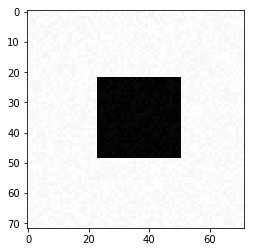

In [27]:
# example of data
im = generate_a_rectangle(10)
plt.imshow(im.reshape(72,72), cmap='gray')

### training a CNN

In [28]:
# generate the data (keep the same number of datas to be able to compare CNN vs linear classifier)
[X_train, Y_train] = generate_dataset_classification(300, 20, True)
[X_val, Y_val] = generate_dataset_classification(100, 20, True)

Creating data:
0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 Creating data:
0 10 20 30 40 50 60 70 80 90 

To build this architecture I used the fact that in CNN, deeper layer are more effectives if they use higher number of filters of lower dimension. Hence I depleted the dimension of the filter at each iteration and I've augmented the number of filters. I also used dropout to avoid overfitting and I replaced the Flatten layer by a GlobalAveragePooling2D layer (see [Section 3.2](https://arxiv.org/pdf/1312.4400.pdf)) allowing to reduce the number of parameters to tune from 2,000,000 down to 10,000.

__Note__: I incremented the value of the percentage of dropout because the first convolutional layers have fewer parameters to update and allow us to recognize shape and texture while the last convolutional layers allow to distinguish complex geometric shape and hence need a higher dropout to avoid overfitting

__Note 2__: For unknown reason each time I execute the cell for the first time I got a validation accuracy of 40%. I need to reexecute the model (below cell) as well as the training cell to obtain a good accuracy.

In [48]:
from keras import regularizers
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, GlobalAveragePooling2D, Flatten
from keras.constraints import maxnorm

model = Sequential()

model.add(Conv2D(filters=16, kernel_size=5, padding='same', activation='relu', input_shape=(72, 72, 1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.1))

model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(GlobalAveragePooling2D())

# model.add(Flatten())
# model.add(Dense(100, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(3, activation='softmax'))

adam = optimizers.Adam(lr=1e-2, beta_1=0.8, beta_2=0.999, epsilon=1e-08)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 72, 72, 16)        416       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 36, 36, 16)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 36, 36, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 36, 36, 32)        2080      
_________________________________________________________________
dropout_15 (Dropout)         (None, 36, 36, 32)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 18, 18, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 18, 18, 64)        8256      
__________

In [49]:
epochs = 100

Y_train_bin = to_categorical(Y_train)
Y_val_bin = to_categorical(Y_val)

X_train_reshaped = X_train.reshape(X_train.shape[0], 72, -1, 1)
X_val_reshaped = X_val.reshape(X_val.shape[0], 72, -1, 1)

checkpointer = ModelCheckpoint(filepath='saved_models/part4_CNN/weights.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)

# train the model
model.fit(X_train_reshaped, Y_train_bin, 
          validation_data=(X_val_reshaped, Y_val_bin),
          epochs=epochs, batch_size=32, callbacks=[checkpointer, TQDMNotebookCallback(leave_inner=True, leave_outer=True)], verbose=0)

Epoch 00000: val_loss improved from inf to 1.10285, saving model to saved_models/part4_CNN/weights.best.from_scratch.hdf5


Epoch 00001: val_loss improved from 1.10285 to 1.06749, saving model to saved_models/part4_CNN/weights.best.from_scratch.hdf5


Epoch 00002: val_loss did not improve


Epoch 00003: val_loss improved from 1.06749 to 1.01252, saving model to saved_models/part4_CNN/weights.best.from_scratch.hdf5


Epoch 00004: val_loss improved from 1.01252 to 0.94444, saving model to saved_models/part4_CNN/weights.best.from_scratch.hdf5


Epoch 00005: val_loss did not improve


Epoch 00006: val_loss improved from 0.94444 to 0.90550, saving model to saved_models/part4_CNN/weights.best.from_scratch.hdf5


Epoch 00007: val_loss improved from 0.90550 to 0.89413, saving model to saved_models/part4_CNN/weights.best.from_scratch.hdf5


Epoch 00008: val_loss did not improve


Epoch 00009: val_loss did not improve


Epoch 00010: val_loss did not improve


Epoch 00011: val_loss did not improve


Epoch 00012: val_loss improved from 0.89413 to 0.89290, saving model to saved_models/part4_CNN/weights.best.from_scratch.hdf5


Epoch 00013: val_loss improved from 0.89290 to 0.89207, saving model to saved_models/part4_CNN/weights.best.from_scratch.hdf5


Epoch 00014: val_loss did not improve


Epoch 00015: val_loss did not improve


Epoch 00016: val_loss improved from 0.89207 to 0.84238, saving model to saved_models/part4_CNN/weights.best.from_scratch.hdf5


Epoch 00017: val_loss did not improve


Epoch 00018: val_loss did not improve


Epoch 00019: val_loss did not improve


Epoch 00020: val_loss did not improve


Epoch 00021: val_loss did not improve


Epoch 00022: val_loss did not improve


Epoch 00023: val_loss did not improve


Epoch 00024: val_loss did not improve


Epoch 00025: val_loss did not improve


Epoch 00026: val_loss did not improve


Epoch 00027: val_loss improved from 0.84238 to 0.82949, saving model to saved_models/part4_CNN/weights.best.from_scratch.hdf5


Epoch 00028: val_loss improved from 0.82949 to 0.82565, saving model to saved_models/part4_CNN/weights.best.from_scratch.hdf5


Epoch 00029: val_loss improved from 0.82565 to 0.80652, saving model to saved_models/part4_CNN/weights.best.from_scratch.hdf5


Epoch 00030: val_loss improved from 0.80652 to 0.77381, saving model to saved_models/part4_CNN/weights.best.from_scratch.hdf5


Epoch 00031: val_loss improved from 0.77381 to 0.65077, saving model to saved_models/part4_CNN/weights.best.from_scratch.hdf5


Epoch 00032: val_loss improved from 0.65077 to 0.59746, saving model to saved_models/part4_CNN/weights.best.from_scratch.hdf5


Epoch 00033: val_loss improved from 0.59746 to 0.53593, saving model to saved_models/part4_CNN/weights.best.from_scratch.hdf5


Epoch 00034: val_loss improved from 0.53593 to 0.44938, saving model to saved_models/part4_CNN/weights.best.from_scratch.hdf5


Epoch 00035: val_loss improved from 0.44938 to 0.43107, saving model to saved_models/part4_CNN/weights.best.from_scratch.hdf5


Epoch 00036: val_loss did not improve


Epoch 00037: val_loss did not improve


Epoch 00038: val_loss improved from 0.43107 to 0.36307, saving model to saved_models/part4_CNN/weights.best.from_scratch.hdf5


Epoch 00039: val_loss improved from 0.36307 to 0.36075, saving model to saved_models/part4_CNN/weights.best.from_scratch.hdf5


Epoch 00040: val_loss improved from 0.36075 to 0.34112, saving model to saved_models/part4_CNN/weights.best.from_scratch.hdf5


Epoch 00041: val_loss did not improve


Epoch 00042: val_loss did not improve


Exception in thread Thread-11:
Traceback (most recent call last):
  File "C:\Anaconda3\envs\aind-dog\lib\threading.py", line 914, in _bootstrap_inner
    self.run()
  File "C:\Anaconda3\envs\aind-dog\lib\site-packages\tqdm\_tqdm.py", line 147, in run
    if instance.miniters > 1 and \
AttributeError: 'tqdm_notebook' object has no attribute 'miniters'



Epoch 00043: val_loss did not improve


Epoch 00044: val_loss did not improve


Epoch 00045: val_loss improved from 0.34112 to 0.31218, saving model to saved_models/part4_CNN/weights.best.from_scratch.hdf5


Epoch 00046: val_loss improved from 0.31218 to 0.30649, saving model to saved_models/part4_CNN/weights.best.from_scratch.hdf5


Epoch 00047: val_loss did not improve


Epoch 00048: val_loss improved from 0.30649 to 0.30302, saving model to saved_models/part4_CNN/weights.best.from_scratch.hdf5


Epoch 00049: val_loss improved from 0.30302 to 0.24260, saving model to saved_models/part4_CNN/weights.best.from_scratch.hdf5


Epoch 00050: val_loss did not improve


Epoch 00051: val_loss did not improve


Epoch 00052: val_loss did not improve


Epoch 00053: val_loss improved from 0.24260 to 0.23049, saving model to saved_models/part4_CNN/weights.best.from_scratch.hdf5


Epoch 00054: val_loss improved from 0.23049 to 0.22275, saving model to saved_models/part4_CNN/weights.best.from_scratch.hdf5


Epoch 00055: val_loss improved from 0.22275 to 0.21434, saving model to saved_models/part4_CNN/weights.best.from_scratch.hdf5


Epoch 00056: val_loss did not improve


Epoch 00057: val_loss did not improve


Epoch 00058: val_loss did not improve


Epoch 00059: val_loss did not improve


Epoch 00060: val_loss did not improve


Epoch 00061: val_loss did not improve


Epoch 00062: val_loss improved from 0.21434 to 0.17282, saving model to saved_models/part4_CNN/weights.best.from_scratch.hdf5


Epoch 00063: val_loss did not improve


Epoch 00064: val_loss did not improve


Epoch 00065: val_loss did not improve


Epoch 00066: val_loss improved from 0.17282 to 0.16544, saving model to saved_models/part4_CNN/weights.best.from_scratch.hdf5


Epoch 00067: val_loss did not improve


Epoch 00068: val_loss did not improve


Epoch 00069: val_loss did not improve


Epoch 00070: val_loss did not improve


Epoch 00071: val_loss improved from 0.16544 to 0.14979, saving model to saved_models/part4_CNN/weights.best.from_scratch.hdf5


Epoch 00072: val_loss did not improve


Epoch 00073: val_loss did not improve


Epoch 00074: val_loss improved from 0.14979 to 0.14612, saving model to saved_models/part4_CNN/weights.best.from_scratch.hdf5


Epoch 00075: val_loss did not improve


Epoch 00076: val_loss did not improve


Epoch 00077: val_loss did not improve


Epoch 00078: val_loss did not improve


Epoch 00079: val_loss improved from 0.14612 to 0.14051, saving model to saved_models/part4_CNN/weights.best.from_scratch.hdf5


Epoch 00080: val_loss did not improve


Epoch 00081: val_loss did not improve


Epoch 00082: val_loss improved from 0.14051 to 0.11636, saving model to saved_models/part4_CNN/weights.best.from_scratch.hdf5


Epoch 00083: val_loss did not improve


Epoch 00084: val_loss did not improve


Epoch 00085: val_loss did not improve


Epoch 00086: val_loss did not improve


Epoch 00087: val_loss improved from 0.11636 to 0.10094, saving model to saved_models/part4_CNN/weights.best.from_scratch.hdf5


Epoch 00088: val_loss did not improve


Epoch 00089: val_loss did not improve


Epoch 00090: val_loss improved from 0.10094 to 0.09779, saving model to saved_models/part4_CNN/weights.best.from_scratch.hdf5


Epoch 00091: val_loss did not improve


Epoch 00092: val_loss improved from 0.09779 to 0.08320, saving model to saved_models/part4_CNN/weights.best.from_scratch.hdf5


Epoch 00093: val_loss did not improve


Epoch 00094: val_loss did not improve


Epoch 00095: val_loss improved from 0.08320 to 0.08125, saving model to saved_models/part4_CNN/weights.best.from_scratch.hdf5


Epoch 00096: val_loss improved from 0.08125 to 0.07799, saving model to saved_models/part4_CNN/weights.best.from_scratch.hdf5


Epoch 00097: val_loss improved from 0.07799 to 0.07717, saving model to saved_models/part4_CNN/weights.best.from_scratch.hdf5


Epoch 00098: val_loss improved from 0.07717 to 0.07229, saving model to saved_models/part4_CNN/weights.best.from_scratch.hdf5


Epoch 00099: val_loss did not improve


In [50]:
## load best weights
model.load_weights('saved_models/part4_CNN/weights.best.from_scratch.hdf5')

### Test the accuracy using the CNN

In [51]:
## Test the model
X_test_reshaped = X_test.reshape(X_test.shape[0], 72, -1, 1)
score = model.evaluate(X_test_reshaped, Y_test, batch_size=32)

224/300 [=====================>........] - ETA: 0s - ETA: 0s

In [52]:
print('loss: %.02f, accuracy: %.02f %%' % (score[0], score[1]*100))

loss: 0.08, accuracy: 98.33 %


As expected the CNN achieves higher accuracy. Here I get 98.33% accuracy which is not that bad. This is due to the fact that CNN actually overlaps a convolutional window over each part of the image allowing to capture the meaning of an image (as surrounding pixel of an image are likely to describe a certain shape). Moreover, decreasing the size of the image using maxpooling allow to capture more complex shape and texture at more in depth layer of the neural network. Hence CNN are the most widely used network for image recognition.

__Note__: Actually, nowadays, the most used neural network are residual network which is nothing but a CNN with direct connection between each layer (to prevent vanish gradient problem). Also, quite recently Hinton proposes the idea of Capsule Network that might lead to better performance (See [this video](https://www.youtube.com/watch?v=pPN8d0E3900) for a great explanation of Capsule Network)

### Plot the images that the CNN didn't recognize

In [53]:
d = {0: 'rectangle', 1: 'disk', 2: 'triangle'}

bad_classification = []
classes = []

for i in range(X_test.shape[0]):
    Y_pred = model.predict(X_test[i].reshape(1,72,72,1))
    if np.argmax(Y_pred) != np.argmax(Y_test[i]):
        bad_classification.append(X_test[i].reshape(72,72))
        classes.append((d[np.argmax(Y_test[i])], d[np.argmax(Y_pred)]))

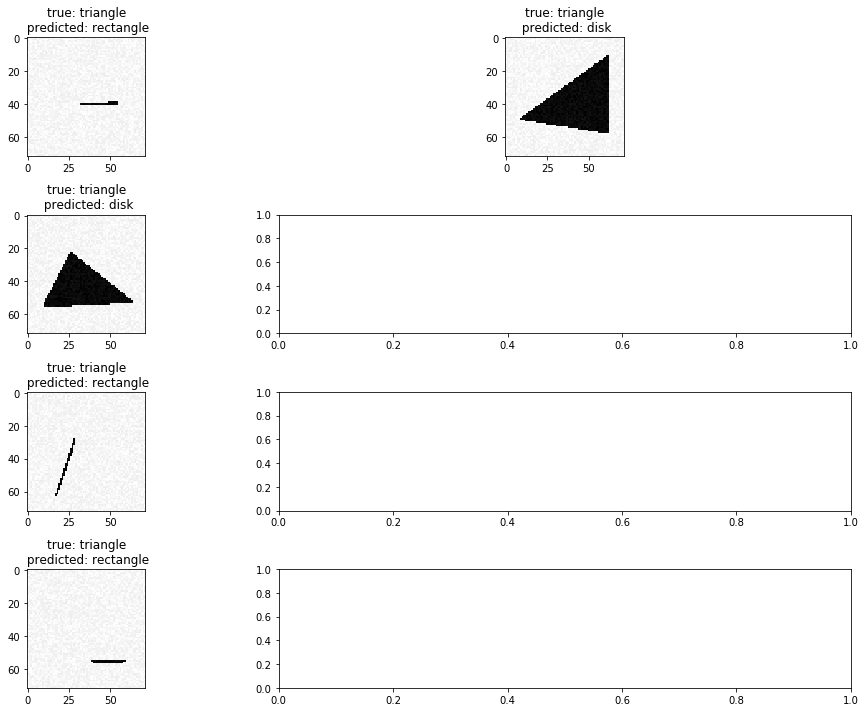

In [56]:
cols, rows = 4, int((len(bad_classification)/4))+1
fig, ax = plt.subplots(cols, rows, figsize=(15,10))

j = -1
for i, img in enumerate(bad_classification):
    if i % 4 == 0:
        j += 1
    ax[i % 4][j].imshow(img, cmap='gray')
    ax[i % 4][j].set_title('true: %s\n predicted: %s' % (classes[i][0], classes[i][1]))

plt.tight_layout()

We can see that most of the bad classified examples are understandable from a human viewpoint as most of them are degenerated triangles that looks like a line. Hence the classifier misclassified it as being a rectangle. On the contrary the model sometimes misclassify a triangle as being a disk. This happens when the triangle is large. To avoid this phenomenon we can add more layer and in particular max-pooling layer.

## 5. A regression Problem

In [123]:
[X_train, Y_train] = generate_dataset_regression(3000, 20)
[X_val, Y_val] = generate_dataset_regression(1000, 20)

Creating data:
0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 
240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390 400 410 420 430 440 450 460 470 480 490 500 510 520 530 540 550 560 570 580 590 600 610 620 630 640 650 660 670 680 690 700 710 720 730 740 750 760 770 780 790 800 810 820 830 840 850 860 870 880 890 900 910 920 930 940 950 960 970 980 990 1000 1010 1020 1030 1040 1050 1060 1070 1080 1090 1100 1110 1120 1130 1140 1150 1160 1170 1180 1190 1200 1210 1220 1230 1240 1250 1260 1270 1280 1290 1300 1310 1320 1330 1340 1350 1360 1370 1380 1390 1400 1410 1420 1430 1440 1450 1460 1470 1480 1490 1500 1510 1520 1530 1540 1550 1560 1570 1580 1590 1600 1610 1620 1630 1640 1650 1660 1670 1680 1690 1700 1710 1720 1730 1740 1750 1760 1770 1780 1790 1800 1810 1820 1830 1840 1850 1860 1870 1880 1890 1900 1910 1920 1930 1940 1950 1960 1970 1980 1990 2000 2010 2020 2030 2040 2050 2060 2070 2080 2090 2100 2110 2120 2130 2140 2150 2160 2170 2180 

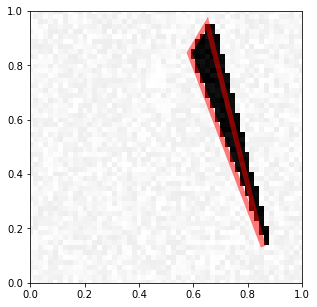

In [124]:
# visualize a training sample
# Y_train[0] is a vector of length 6
idx = 150

visualize_prediction(X_train[idx], Y_train[idx])

In [77]:
# def sort_triangles(Y):
#     for i, y in enumerate(Y_):
#         ids = np.argsort(y[:, 0], axis=0)
#         Y_[i] = y[ids]

In [153]:
def sort_triangles(Y):
    Y_ = Y.reshape(-1, 3, 2)
    U = Y_.copy()
    S = np.argsort(Y[:, ::2], axis=1)
    for i, e in enumerate(S):
        U[i, :] = U[i,e]
    
    return U.reshape(-1, 6)

In [155]:
Y_train_sort = sort_triangles(Y_train)
Y_val_sort = sort_triangles(Y_val)

### CNN model with 6 outputs and square loss

In [164]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=5, activation='relu', input_shape=(72, 72, 1)))
# model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=2))


model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
# model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
# model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(6))

adam = optimizers.Adam(lr=1e-3, beta_1=0.7, beta_2=0.999, epsilon=1e-08)
model.compile(loss='mean_squared_error', optimizer=adam)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 68, 68, 16)        416       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 34, 34, 16)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 15, 15, 64)        8256      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 3136)              0         
__________

In [165]:
epochs = 100

X_train_reshaped = X_train.reshape(X_train.shape[0], 72, -1, 1)
X_val_reshaped = X_val.reshape(X_val.shape[0], 72, -1, 1)

# checkpointer = ModelCheckpoint(filepath='saved_models/part5/weights.best.from_scratch.hdf5', 
#                                verbose=1, save_best_only=False)

checkpointer = ModelCheckpoint(filepath='saved_models/part5/weights.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)

# train the model
model.fit(X_train_reshaped, Y_train_sort, 
          validation_data=(X_val_reshaped, Y_val_sort),
          epochs=epochs, batch_size=96, callbacks=[checkpointer, TQDMNotebookCallback(leave_inner=True, leave_outer=True)], verbose=0)

Epoch 00000: val_loss improved from inf to 0.03825, saving model to saved_models/part5/weights.best.from_scratch.hdf5


Epoch 00001: val_loss improved from 0.03825 to 0.02400, saving model to saved_models/part5/weights.best.from_scratch.hdf5


Epoch 00002: val_loss improved from 0.02400 to 0.01604, saving model to saved_models/part5/weights.best.from_scratch.hdf5


Epoch 00003: val_loss improved from 0.01604 to 0.01409, saving model to saved_models/part5/weights.best.from_scratch.hdf5


Epoch 00004: val_loss improved from 0.01409 to 0.01306, saving model to saved_models/part5/weights.best.from_scratch.hdf5


Epoch 00005: val_loss improved from 0.01306 to 0.00907, saving model to saved_models/part5/weights.best.from_scratch.hdf5


Epoch 00006: val_loss did not improve


Epoch 00007: val_loss did not improve


Epoch 00008: val_loss did not improve


Epoch 00009: val_loss improved from 0.00907 to 0.00699, saving model to saved_models/part5/weights.best.from_scratch.hdf5


Epoch 00010: val_loss did not improve


Epoch 00011: val_loss did not improve


Epoch 00012: val_loss improved from 0.00699 to 0.00667, saving model to saved_models/part5/weights.best.from_scratch.hdf5


Epoch 00013: val_loss improved from 0.00667 to 0.00657, saving model to saved_models/part5/weights.best.from_scratch.hdf5


Epoch 00014: val_loss did not improve


Epoch 00015: val_loss improved from 0.00657 to 0.00585, saving model to saved_models/part5/weights.best.from_scratch.hdf5


Epoch 00016: val_loss did not improve


Epoch 00017: val_loss did not improve


Epoch 00018: val_loss improved from 0.00585 to 0.00580, saving model to saved_models/part5/weights.best.from_scratch.hdf5


Epoch 00019: val_loss improved from 0.00580 to 0.00545, saving model to saved_models/part5/weights.best.from_scratch.hdf5


Epoch 00020: val_loss improved from 0.00545 to 0.00544, saving model to saved_models/part5/weights.best.from_scratch.hdf5


Epoch 00021: val_loss improved from 0.00544 to 0.00530, saving model to saved_models/part5/weights.best.from_scratch.hdf5


Epoch 00022: val_loss did not improve


Epoch 00023: val_loss did not improve


Epoch 00024: val_loss did not improve


Epoch 00025: val_loss did not improve


Epoch 00026: val_loss improved from 0.00530 to 0.00529, saving model to saved_models/part5/weights.best.from_scratch.hdf5


Epoch 00027: val_loss improved from 0.00529 to 0.00487, saving model to saved_models/part5/weights.best.from_scratch.hdf5


Epoch 00028: val_loss did not improve


Epoch 00029: val_loss did not improve


Epoch 00030: val_loss improved from 0.00487 to 0.00483, saving model to saved_models/part5/weights.best.from_scratch.hdf5


Epoch 00031: val_loss did not improve


Epoch 00032: val_loss improved from 0.00483 to 0.00480, saving model to saved_models/part5/weights.best.from_scratch.hdf5


Epoch 00033: val_loss did not improve


Epoch 00034: val_loss did not improve


Epoch 00035: val_loss improved from 0.00480 to 0.00472, saving model to saved_models/part5/weights.best.from_scratch.hdf5


Epoch 00036: val_loss improved from 0.00472 to 0.00471, saving model to saved_models/part5/weights.best.from_scratch.hdf5


Epoch 00037: val_loss did not improve


Epoch 00038: val_loss improved from 0.00471 to 0.00469, saving model to saved_models/part5/weights.best.from_scratch.hdf5


Epoch 00039: val_loss did not improve


Epoch 00040: val_loss improved from 0.00469 to 0.00464, saving model to saved_models/part5/weights.best.from_scratch.hdf5


Epoch 00041: val_loss did not improve


Epoch 00042: val_loss did not improve


Epoch 00043: val_loss did not improve


Epoch 00044: val_loss did not improve


Epoch 00045: val_loss improved from 0.00464 to 0.00448, saving model to saved_models/part5/weights.best.from_scratch.hdf5


Epoch 00046: val_loss did not improve


Epoch 00047: val_loss did not improve


Epoch 00048: val_loss did not improve


Epoch 00049: val_loss did not improve


Epoch 00050: val_loss did not improve


Epoch 00051: val_loss did not improve


Epoch 00052: val_loss did not improve


Epoch 00053: val_loss did not improve


Epoch 00054: val_loss did not improve


Epoch 00055: val_loss improved from 0.00448 to 0.00444, saving model to saved_models/part5/weights.best.from_scratch.hdf5


Epoch 00056: val_loss did not improve


Epoch 00057: val_loss did not improve


Epoch 00058: val_loss did not improve


Epoch 00059: val_loss did not improve


Epoch 00060: val_loss did not improve


Epoch 00061: val_loss did not improve


Epoch 00062: val_loss improved from 0.00444 to 0.00441, saving model to saved_models/part5/weights.best.from_scratch.hdf5


Epoch 00063: val_loss did not improve


Epoch 00064: val_loss did not improve


Epoch 00065: val_loss did not improve


Epoch 00066: val_loss did not improve


Epoch 00067: val_loss did not improve


Epoch 00068: val_loss did not improve


Epoch 00069: val_loss did not improve


Epoch 00070: val_loss did not improve


Epoch 00071: val_loss did not improve


Epoch 00072: val_loss improved from 0.00441 to 0.00423, saving model to saved_models/part5/weights.best.from_scratch.hdf5


Epoch 00073: val_loss did not improve


Epoch 00074: val_loss did not improve


Epoch 00075: val_loss did not improve


Epoch 00076: val_loss did not improve


Epoch 00077: val_loss did not improve


Epoch 00078: val_loss did not improve


Epoch 00079: val_loss did not improve


Epoch 00080: val_loss did not improve


Epoch 00081: val_loss did not improve


Epoch 00082: val_loss did not improve


Epoch 00083: val_loss did not improve


Epoch 00084: val_loss did not improve


Epoch 00085: val_loss did not improve


Epoch 00086: val_loss did not improve


Epoch 00087: val_loss improved from 0.00423 to 0.00421, saving model to saved_models/part5/weights.best.from_scratch.hdf5


Epoch 00088: val_loss did not improve


Epoch 00089: val_loss did not improve


Epoch 00090: val_loss did not improve


Epoch 00091: val_loss did not improve


Epoch 00092: val_loss did not improve


Epoch 00093: val_loss did not improve


Epoch 00094: val_loss did not improve


Epoch 00095: val_loss did not improve


Epoch 00096: val_loss did not improve


Epoch 00097: val_loss did not improve


Epoch 00098: val_loss did not improve


Epoch 00099: val_loss did not improve


In [166]:
## load the best weights
model.load_weights('saved_models/part5/weights.best.from_scratch.hdf5')

In [167]:
[X_test, Y_test] = generate_dataset_regression(50, 20)

Creating data:
0 10 20 30 40 

#### plot training  input + predicted coord (on testing set):

In [ ]:
    I = x.reshape((72,72))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)

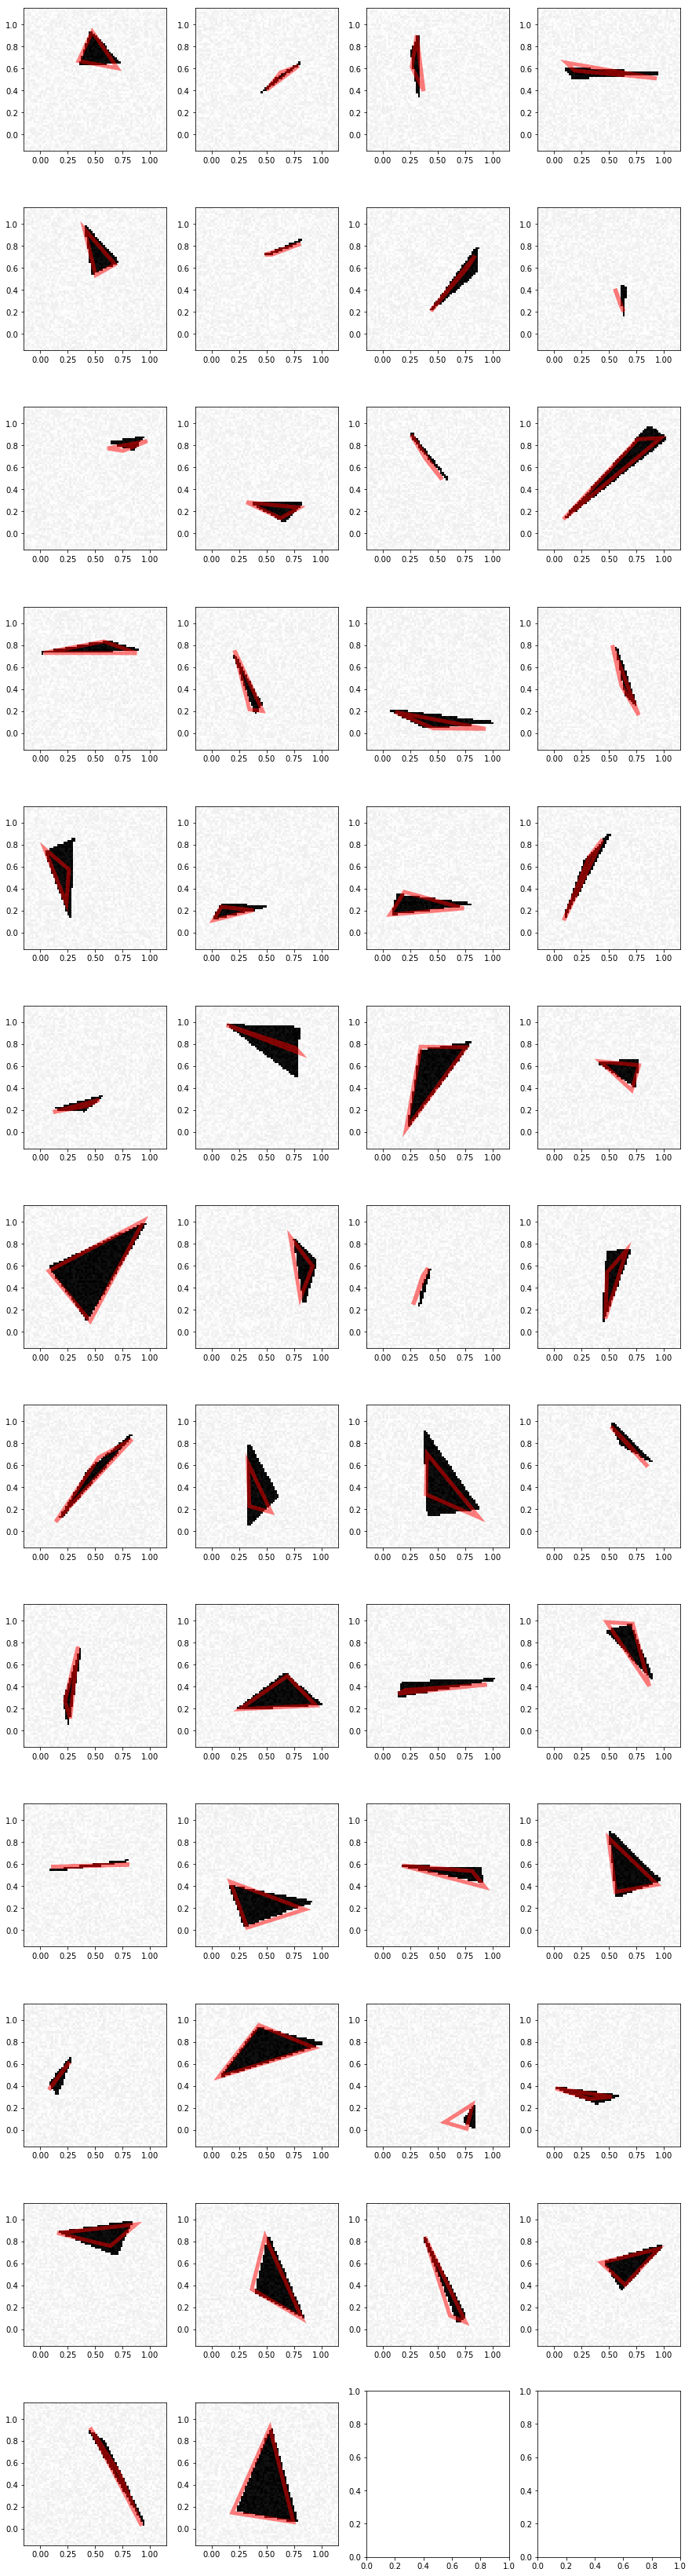

In [175]:
cols, rows = int((len(X_test)/4))+1, 4 
fig, ax = plt.subplots(cols, rows, figsize=(15,60))

j = -1
for i, x in enumerate(X_test):
    if i % 4 == 0:
        j += 1
        
    I = x.reshape((72,72))
    
    y = model.predict(x.reshape(1,72,72,1))
    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    
    
    ax[j][i % 4].imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax[j][i % 4].add_patch(tri)

__Conclusion__: As we can see on the previous figure, the neural network is able to roughly determine the coordinates of the corners of the triangles. We actually help it by reordering the output (Y_train) by increasing x. If we didn't do that the neural network couldn't guess which corner we want to recover the position (actually if we didn't do that the mimimum loss I could have obtain with the same network is 0.05 while here it is 0.00421!

The neural network is far from being perfect. I've tried other options such as transforming the problem into a classification problem with a 72*72 output vector with 0 everywhere and 1 at the position of the corner (where I've transform the cordinate of the point (x,y) using: [72*x] + [y]). I had to change my neural network in such a way that the output is a dense layer with shape (72*72=5184) with a sigmoid for each neuron. This architecture doesn't work well as we could have guess because the output shape is too large, because we don't have enough training data...

One way to actually improve the neural network would be to define a new loss function that calculate the percentage of surface in common between the ground truth and our predicted shape. We could have also built 3 neural network for each corner...

__Note__:  For the regression problem I've actually generated much more data (3000 instead of 300 for the training) and 1000 for the validation set.

__Note 2 __: I Could have use the validation_split parameter from Keras instead of generating each time a different set.